In [1]:
# Test 
import pandas as pd 
import numpy as np 
from ta.momentum import RSIIndicator
from ta.trend import MACD
from ta.volume import VolumeWeightedAveragePrice
from ta.volatility import average_true_range
import ta

In [2]:
df_BTCUSD = pd.read_csv(r'C:\Users\Proab\OneDrive\Bureau\Dev projects\crypto-trading-strategy-1\data\BTC_USDT_data.csv')
df_BTCUSD

,date,open,high,low,close,volume
0,2024-10-26 15:30:00,66937.37,66960.00,66872.01,66913.99,58.22
1,2024-10-26 15:35:00,66913.99,66952.00,66883.15,66935.99,29.92
2,2024-10-26 15:40:00,66935.99,67010.00,66935.99,66988.70,65.66
3,2024-10-26 15:45:00,66988.69,66988.69,66904.44,66919.99,22.46
4,2024-10-26 15:50:00,66919.99,66925.77,66881.12,66881.13,17.71
...,...,...,...,...,...,...
8635,2024-11-25 15:05:00,95555.99,95616.00,95055.96,95073.68,750.40
8636,2024-11-25 15:10:00,95073.69,95287.50,94525.00,95252.49,1346.55
8637,2024-11-25 15:15:00,95252.49,95603.74,95136.01,95400.00,644.54
8638,2024-11-25 15:20:00,95400.00,95620.00,95144.97,95619.99,459.64


In [3]:
# Adding technical indicators

#RSI
rsi_period = 7  
df_BTCUSD['RSI'] = RSIIndicator(close=df_BTCUSD['close'], window=rsi_period).rsi()

# MACD
macd = MACD(close=df_BTCUSD['close'],window_slow=15, window_fast=5, window_sign=7)
df_BTCUSD['MACD'] = macd.macd()         
df_BTCUSD['MACD_Signal'] = macd.macd_signal()  
df_BTCUSD['MACD_Diff'] = macd.macd_diff()     

# VWAP
vwap = VolumeWeightedAveragePrice(high=df_BTCUSD['high'], low=df_BTCUSD['low'], close=df_BTCUSD['close'], volume=df_BTCUSD['volume'])
df_BTCUSD['VWAP'] = vwap.volume_weighted_average_price()

#Momentum

df_BTCUSD['Momentum'] = df_BTCUSD['close'] - df_BTCUSD['close'].shift(3)

#ATR

df_BTCUSD['ATR'] = ta.volatility.average_true_range(df_BTCUSD['high'], df_BTCUSD['low'], df_BTCUSD['close'], window=5)

df_BTCUSD[['RSI', 'MACD', 'MACD_Diff', 'VWAP', 'Momentum', 'ATR']].head()

,RSI,MACD,MACD_Diff,VWAP,Momentum,ATR
0,NaN,NaN,NaN,NaN,NaN,0.000
1,NaN,NaN,NaN,NaN,NaN,0.000
2,NaN,NaN,NaN,NaN,NaN,0.000
3,NaN,NaN,NaN,NaN,6.00,0.000
4,NaN,NaN,NaN,NaN,-54.86,71.952


In [4]:
df_BTCUSD = df_BTCUSD.dropna()
df_BTCUSD[['RSI', 'MACD', 'MACD_Diff', 'VWAP', 'Momentum', 'ATR']].head()

,RSI,MACD,MACD_Diff,VWAP,Momentum,ATR
20,61.932292,36.603840,5.429874,66932.893561,26.01,52.514062
21,66.467373,38.591143,5.562883,66936.687555,38.59,51.837249
22,66.676696,38.357023,3.996572,66955.969650,1.71,47.353800
23,70.379515,40.305577,4.458844,66964.338835,41.50,41.921040
24,74.250114,44.033667,6.140201,66982.674000,39.21,37.636832


In [ ]:
df_BTCUSD[['RSI', 'MACD', 'MACD_Diff', 'VWAP', 'Momentum', 'ATR']].describe()

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Target
df_BTCUSD['return'] = df_BTCUSD['close'].pct_change().shift(-1)
df_BTCUSD['target'] = (df_BTCUSD['return'] > 0).astype(int)

# Normalizing Data
features_to_scale = ['MACD_Diff', 'VWAP', 'ATR', 'RSI']
scaler = StandardScaler()
df_BTCUSD[features_to_scale] = scaler.fit_transform(df_BTCUSD[features_to_scale])

# Preparing Data for regression
X = df_BTCUSD[features_to_scale]
y = df_BTCUSD['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

C:\Users\Proab\AppData\Local\Temp\ipykernel_27028\118163848.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_BTCUSD['return'] = df_BTCUSD['close'].pct_change().shift(-1)
C:\Users\Proab\AppData\Local\Temp\ipykernel_27028\118163848.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_BTCUSD['target'] = (df_BTCUSD['return'] > 0).astype(int)
C:\Users\Proab\AppData\Local\Temp\ipykernel_27028\118163848.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [20]:
df_BTCUSD.head(10)

,date,open,high,low,close,volume,RSI,MACD,MACD_Signal,MACD_Diff,VWAP,Momentum,ATR,return,target
20,2024-10-26 17:10:00,67028.11,67045.99,67006.00,67006.00,40.00,0.654371,0.126702,31.173966,0.095029,-1.348010,0.065649,-1.096495,0.000340,1
21,2024-10-26 17:15:00,67006.00,67040.00,66990.87,67028.79,19.36,0.940443,0.139552,33.028260,0.097266,-1.347665,0.117007,-1.102463,0.000015,1
22,2024-10-26 17:20:00,67028.80,67029.82,67000.40,67029.82,12.24,0.953648,0.138038,34.360451,0.070924,-1.345914,-0.033556,-1.141998,0.000264,1
23,2024-10-26 17:25:00,67029.81,67050.00,67029.81,67047.50,12.36,1.187221,0.150638,35.846732,0.078699,-1.345154,0.128888,-1.189903,0.000306,1
24,2024-10-26 17:30:00,67047.50,67068.00,67047.50,67068.00,12.13,1.431379,0.174744,37.893466,0.106976,-1.343488,0.119539,-1.227680,0.000610,1
25,2024-10-26 17:35:00,67068.00,67140.00,67067.99,67108.89,39.75,1.810132,0.232026,41.643200,0.192898,-1.342223,0.282268,-1.167061,0.000089,1
26,2024-10-26 17:40:00,67108.89,67135.52,67086.00,67114.85,23.73,1.857637,0.259219,45.506853,0.198645,-1.341287,0.234421,-1.158228,-0.000032,0
27,2024-10-26 17:45:00,67114.85,67132.29,67082.85,67112.71,16.71,1.777280,0.256815,48.311654,0.145223,-1.340029,0.141993,-1.151303,-0.000392,0
28,2024-10-26 17:50:00,67112.70,67113.89,67078.17,67086.43,14.32,0.852461,0.204727,48.401395,0.008239,-1.339012,-0.132231,-1.169959,-0.000364,0
29,2024-10-26 17:55:00,67086.42,67093.86,67061.18,67062.00,27.05,0.169986,0.128320,45.514568,-0.141940,-1.337828,-0.256299,-1.190245,-0.000329,0


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [22]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[266 590]
 [266 602]]

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.31      0.38       856
           1       0.51      0.69      0.58       868

    accuracy                           0.50      1724
   macro avg       0.50      0.50      0.48      1724
weighted avg       0.50      0.50      0.48      1724



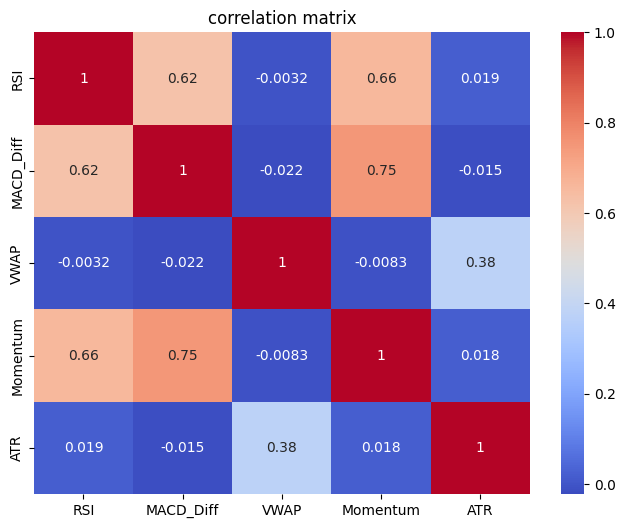

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

#Analyzing the correlation 

plt.figure(figsize=(8, 6))
sns.heatmap(df_BTCUSD[['RSI', 'MACD_Diff', 'VWAP', 'Momentum', 'ATR']].corr(), annot=True, cmap='coolwarm')
plt.title('correlation matrix')
plt.show()

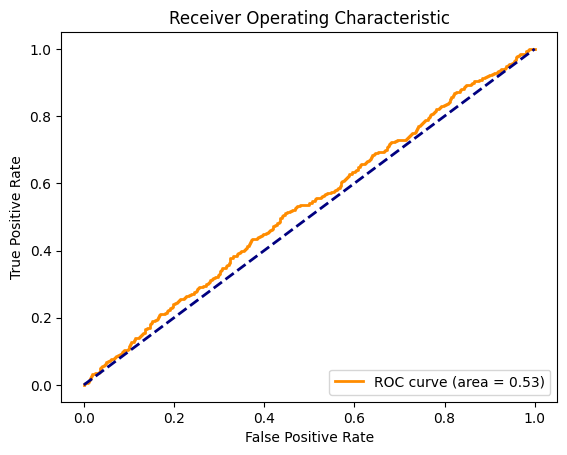

In [18]:
from sklearn.metrics import roc_curve, auc

# Calcul des courbes ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot de la courbe ROC
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [17]:
y_prob = logistic_model.predict_proba(X_test)[:, 1]
adjusted_pred = (y_prob >= 0.55).astype(int)
adjusted_pred

array([0, 0, 0, ..., 0, 0, 0])